In [75]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

In [76]:
plt.rcParams['figure.figsize'] = [12, 12]

First we'll create a function to compute a linaer combination of cosine basis functions from the coefficients.

In [97]:
def linear_combo(coeffs):
    """
        Return a Python function implementing a linear combination of cosine
        basis functions with coefficients given by coeffs.
        coeffs: [float]
        return f:float -> float
    """
    n = len(coeffs)
    
    def f(x):
        """
            The function f implementing the linear combination.
            x: a float or integer or numpy array of inputs
        """
        
        # output: an array of cosine basis functions evaluated at x
        if isinstance(x, float) or isinstance(x, int):
            output = np.array(
                [1 if i==0 else np.sqrt(2) * np.cos(i * np.pi * x) for i in range(n)]
            )
        else:
            output = np.array(
                [np.ones(len(x)) if i==0 else np.sqrt(2) * np.cos(i * np.pi * x) for i in range(n)]
            )
            
        # Compute the output as a dot product    
        return np.sum(np.array(coeffs).reshape(-1,1) * output, axis=0)
        
    return f

We'll use the next function to plot the partial sums for each function in the exercise.

In [98]:
def plot_partials(func, coeffs, skip=1):
    """
        Plot the function along with as many of its partial sums 
        with respect to the cosine basis as specified in coeffs.
        func: the function to plot
        coeffs: the first n coefficients of func with respect
            to the cosine basis
        skip: a parameter to set which partial sums to skip
            e.g. if skip is 3 then each third partial sum will be plotted
    """
    
    # The number of partial sums to consider
    n = len(coeffs)
    
    # Set up the plot
    x = np.linspace(0, 1, 1000)
    nrows = (n+1) // (3 * skip) if (n+1) % (3 * skip) ==0 \
        else (n+1) // (3 * skip) + 1
    fig, axs = plt.subplots(nrows=nrows, ncols=3)
    plt.subplots_adjust(hspace=1, wspace=1)
    
    # Plot the function func
    y = list(map(func, x))
    ax = axs[0][0]
    ax.set_title('The function')
    ax.plot(x, y)
    
    for i in range(1, n+1):
        if i % skip == 0:
            # Plot the ith partial sum
            j = i // skip
            k = j // 3
            l = j % 3
            ax = axs[k][l]
            # The ith partial sum, as a Python function
            lc = linear_combo(coeffs[:i])
            y = lc(x)
            ax.set_title(fr'Partial sum $\sum_{{j=1}}^{{{i}}}\beta_j\phi_j$')
            ax.plot(x, y)

# Part (a)

Since the functions $\sqrt{2} \cos(n \pi x)$ are orthonormal, the integrals of $f(x)$ against $\phi_1,\phi_2,\ldots$ are, respectively $0,0,0,1,0,0,\ldots$, and these are the coefficients $\beta_1,\beta_2,\ldots$.

In [99]:
func = lambda x: np.sqrt(2) * np.cos(3 * np.pi * x)

In [100]:
coeffs = [0,0,0,1,0,0,0,0]

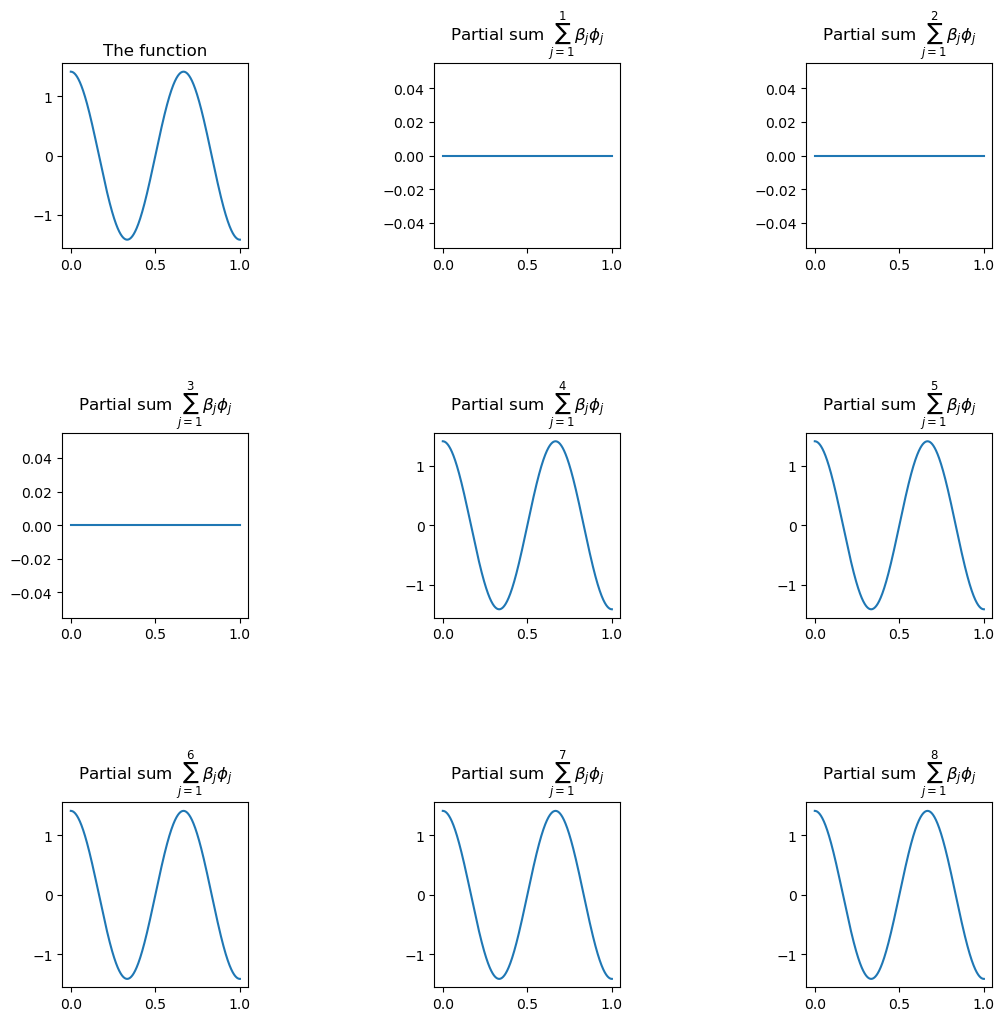

In [101]:
plot_partials(func, coeffs)

# Part (b)

We use the trigonometric identity $\sin(\alpha)\cos(\beta) = \frac{1}{2}(\sin(\beta+\alpha) - \sin(\beta-\alpha))$. Thus we have
$$\int_0^1 \sin(\pi x) \cos(n \pi x)dx = \frac{1}{2}\int_0^1 \sin((n+1)\pi x)dx - \frac{1}{2}\int_0^1 \sin((n-1)\pi x)dx = -\frac{1}{2(n+1)\pi} \left(\cos((n+1)\pi x\right))|_0^{1} + \frac{1}{2(n-1)\pi}\left(\cos((n-1)\pi x\right))|_0^{1}.$$
If $n$ is odd then $\cos((n+1)\pi x)|_0^1=0$ and otherwise it is equal to $-2$. Thus, the integral is
$$\frac{2}{(n+1)\pi} - \frac{2}{(n-1)\pi} = \frac{-2}{(n+1)(n-1)\pi}.$$
Scaling by $\sqrt{2}$ for $n\geq 1$, the coefficients are
$$\beta_0=1, \ \ \ \beta_n = \frac{-2\sqrt{2}}{(n+1)(n-1)\pi} \text{ for } n\geq 2 \text{ even }, \ \ \ \beta_n = 0\text{ for } n \text{ odd}.$$

In [102]:
func = lambda x: np.sin(np.pi * x)

In [103]:
coeffs = [1]

In [104]:
for i in range(1, 26):
    beta = 0 if i%2==1 else (-2 * np.sqrt(2)) / ((i+1) * (i-1) * np.pi)
    coeffs.append(beta)

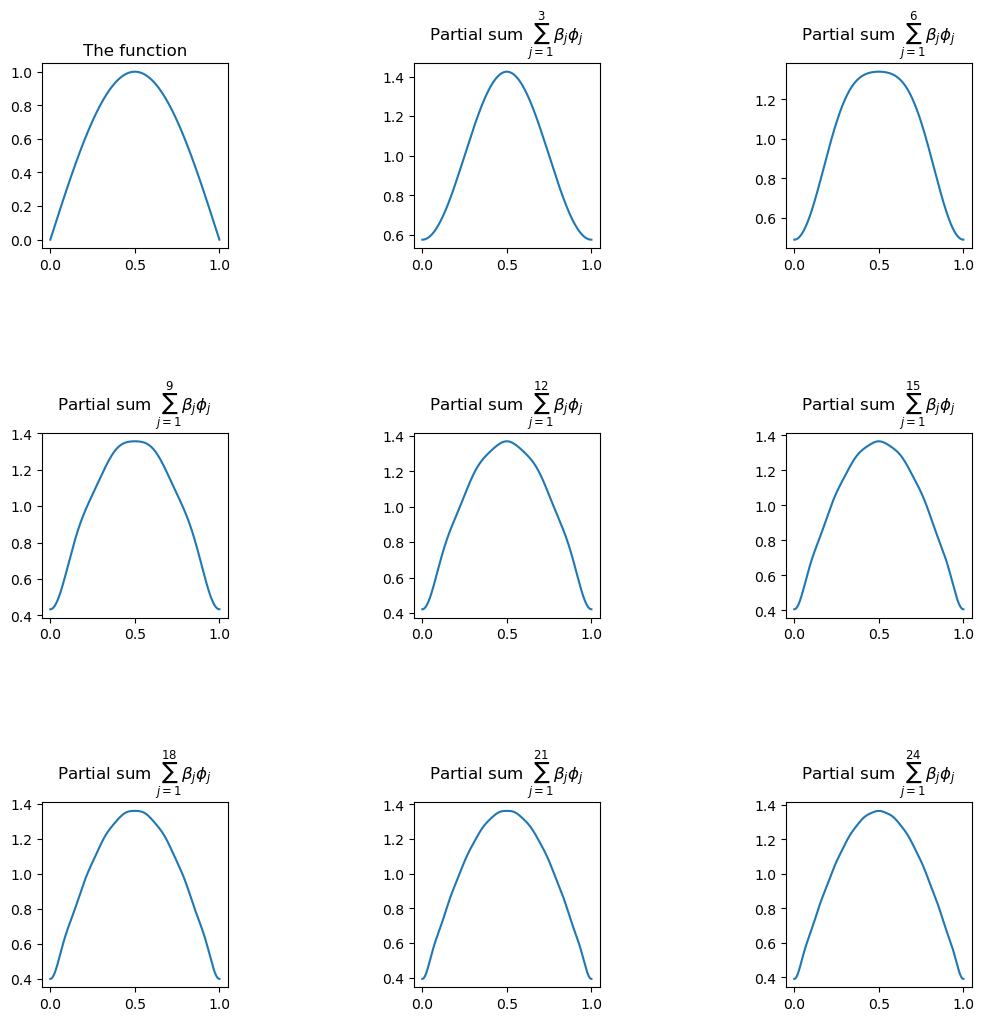

In [105]:
plot_partials(func, coeffs, skip=3)

For parts (c) and (d) we need to compute coefficients numerically. The following function computes the first n coefficients numerically.

In [106]:
def compute_coeffs(func, n):
    """
        Compute the first n coefficients of func as a linear combination
        of cosine basis functions, numerically.
        func: a Python function
        n: the number of coefficients to compute
    """
    coeffs = []
    
    for i in range(n):
        # phi: the ith cosine basis function
        if i==0:
            phi = lambda x: 1
        else:
            phi = lambda x: np.sqrt(2) * np.cos(i * np.pi * x)
        
        # prod: the product of func with phi
        prod = lambda x: func(x) * phi(x)
        
        # Compute the ith coefficient
        beta = quad(prod, 0, 1)[0]
        coeffs.append(beta)
    
    return coeffs

# Part (c)

For part (c) we first need to define the function $K$ specified in the exercise.

In [107]:
K = lambda x: (1 + np.sign(x)) / 2

In [108]:
x = np.linspace(-1,1,1000)

In [109]:
t = np.array([.1,.13,.15,.23,.25,.40,.44,.65,.76,.78,.81])

In [110]:
h = np.array([4,-5,3,-4,5,-4.2,2.1,4.3,-3.1,2.1,-4.2])

In [111]:
# The function f specified in part (c)
func = lambda x: np.sum(h * K(x - t))

In [113]:
# Compute the cosine basis coefficients numerically
coeffs = compute_coeffs(func, 200)

/var/folders/h9/7qb3ygvs0mzb0cdjbh8z8svr0000gn/T/ipykernel_88250/1093656648.py:21: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  beta = quad(prod, 0, 1)[0]
/var/folders/h9/7qb3ygvs0mzb0cdjbh8z8svr0000gn/T/ipykernel_88250/1093656648.py:21: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  beta = quad(prod, 0, 1)[0]


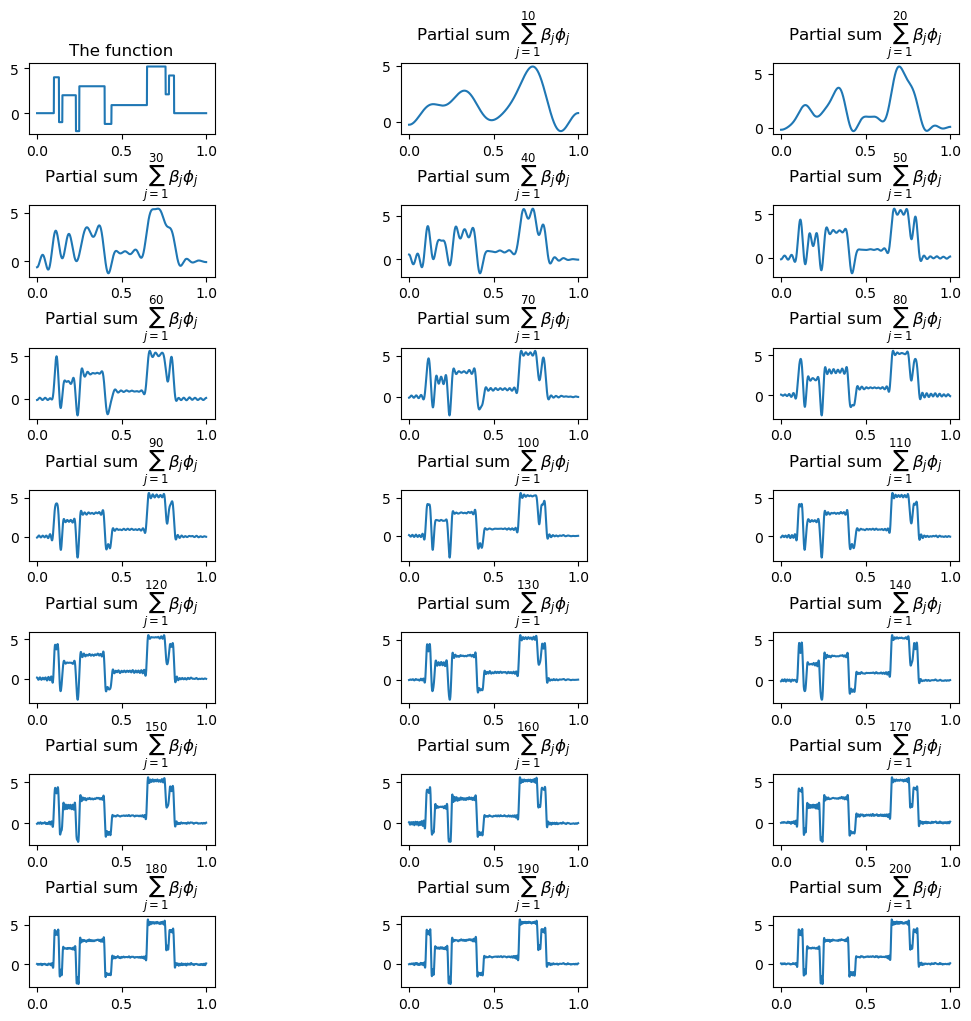

In [114]:
plot_partials(func, coeffs, skip=10)

# Part (d)

In [115]:
func = lambda x: np.sqrt(x * (1 - x)) * np.sin((2.1 * np.pi) / (x + .05))

In [116]:
coeffs = compute_coeffs(func, 401)

/var/folders/h9/7qb3ygvs0mzb0cdjbh8z8svr0000gn/T/ipykernel_88250/1093656648.py:21: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  beta = quad(prod, 0, 1)[0]
/var/folders/h9/7qb3ygvs0mzb0cdjbh8z8svr0000gn/T/ipykernel_88250/1093656648.py:21: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  beta = quad(prod, 0, 1)[0]


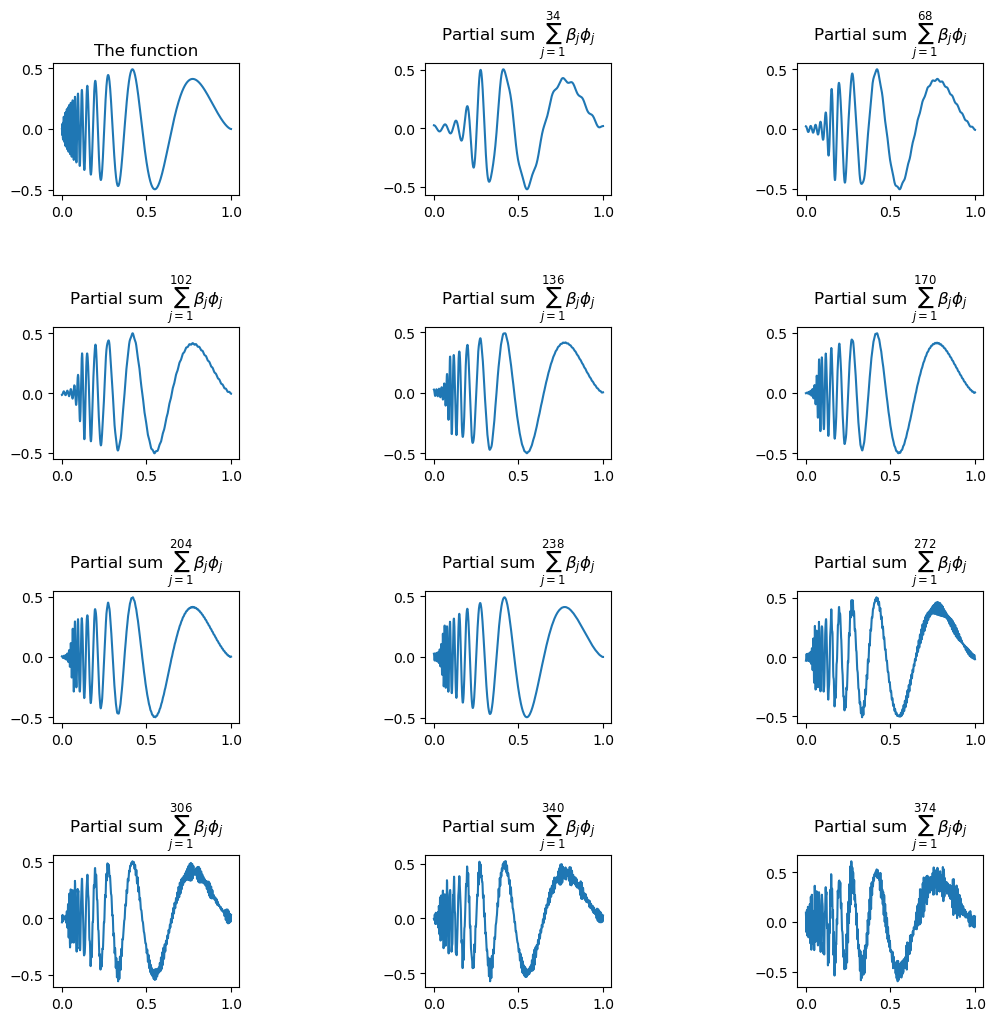

In [117]:
plot_partials(func, coeffs, skip=34)